# LR Model – Sampling Comparison

In [1]:

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from models.train_lr import run
from models.utils import load_dataframe, split_features


In [2]:

MODEL = 'lr'
SAMPLINGS = ['none', 'under', 'smote']


In [3]:

results = {}
for samp in SAMPLINGS:
    print('Running sampling:', samp)
    results[samp] = run(samp)


Running sampling: none
Best params: {'clf__C': 1.0}
[LogisticRegression[none]] precision=0.0597 recall=0.1905 auc=0.5231
Confusion Matrix:
 [[2156   63]
 [  17    4]]
Running sampling: under
Best params: {'clf__C': 1.0}
[LogisticRegression[under]] precision=0.0093 recall=0.5714 auc=0.4537
Confusion Matrix:
 [[ 946 1273]
 [   9   12]]
Running sampling: smote
Best params: {'clf__C': 0.1}
[LogisticRegression[smote]] precision=0.0208 recall=0.1429 auc=0.5030
Confusion Matrix:
 [[2078  141]
 [  18    3]]


In [4]:

metrics_df = pd.DataFrame(
    [{'sampling': samp, **metrics} for samp, metrics in results.items()]
)
metrics_df[['sampling', 'precision', 'recall', 'roc_auc']]


,sampling,precision,recall,roc_auc
0,none,0.059701,0.190476,0.523058
1,under,0.009339,0.571429,0.453722
2,smote,0.020833,0.142857,0.503015


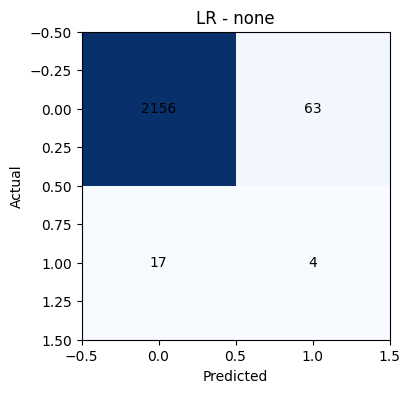

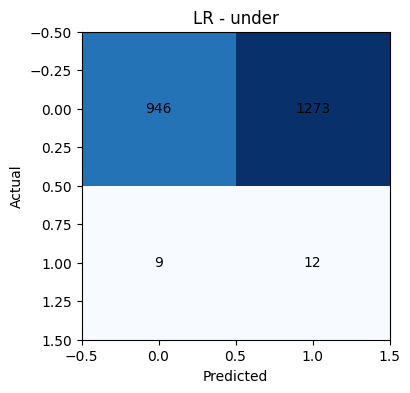

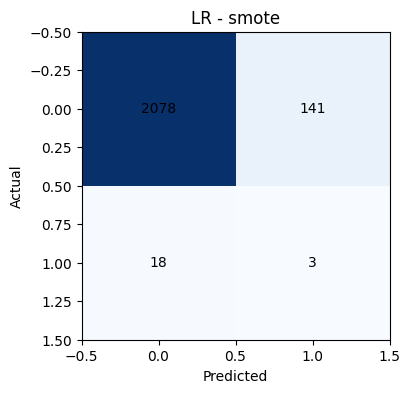

In [5]:

for samp, metrics in results.items():
    cm = metrics['confusion_matrix']
    plt.figure(figsize=(4, 4))
    plt.imshow(cm, cmap='Blues')
    plt.title(f"{MODEL.upper()} - {samp}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, cm[i][j], ha='center', va='center', color='black')
    plt.show()
